# Analyse de données avec scikit-gstat

In [1]:
import skgstat as skg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Récupération des données

In [2]:
data = skg.data.pancake()

## Analyse de la structure des données
Les données sont stockées dans "sample" et les métadonnées dans "origin".

In [3]:
print(type(data))
print(data.keys())

print("Sample", type(data['sample']), data["sample"])
print()
print(type(data['origin']), data["origin"])

<class 'dict'>
dict_keys(['sample', 'origin'])
Sample <class 'tuple'> (array([[382,  69],
       [444, 403],
       [491, 297],
       [444, 316],
       [296, 146],
       [278, 382],
       [145, 481],
       [127,   3],
       [188, 133],
       [163, 420],
       [ 78, 273],
       [191, 276],
       [182, 469],
       [123,  54],
       [206, 252],
       [275, 277],
       [174, 248],
       [351, 415],
       [ 50,  91],
       [ 97, 282],
       [ 25,  11],
       [  1,  83],
       [ 48, 426],
       [353, 331],
       [ 95,  72],
       [429,  99],
       [284, 389],
       [415, 379],
       [ 79, 367],
       [375, 246],
       [408, 498],
       [376, 445],
       [446, 270],
       [ 63, 368],
       [440, 157],
       [207, 235],
       [126, 217],
       [133, 169],
       [ 65, 254],
       [226, 248],
       [103, 373],
       [425,  64],
       [233, 406],
       [130, 223],
       [ 25, 314],
       [ 24, 393],
       [105, 218],
       [105,  80],
       [176, 231]

### 1 : Types et rangement
Dans la variable "sample", les couples X1 et X2 semblent être respectivement les coordonnées des points et les valeurs X2 leur ordonnée. X2 est de type uint8, ce qui fait penser à une image en niveaux de gris, X2 varie entre 0 et  255.

In [4]:
print("Sample", type(data["sample"]))
print(len(data["sample"]))
X1, X2 = data["sample"]

Sample <class 'tuple'>
2


### 2 : Prévisualisation des données

In [5]:
print("X1 size, shape", X1.size, X1.shape)
print("X2 size, shape", X2.size, X2.shape)

X1 size, shape 1000 (500, 2)
X2 size, shape 500 (500,)


On Peut diviser les valeurs en vecteurs simples pour les afficher dans un scatter.

In [6]:
X1_1 = X1[:,0]
X1_2 = X1[:,1]
print(X1_1.shape, X1_2.shape)
print(X1_2)

(500,) (500,)
[ 69 403 297 316 146 382 481   3 133 420 273 276 469  54 252 277 248 415
  91 282  11  83 426 331  72  99 389 379 367 246 498 445 270 368 157 235
 217 169 254 248 373  64 406 223 314 393 218  80 231 317 140 150 290  77
 229 360 363 233 457 342 244 160 361 279 371 221 469  63 338 413  11 138
  71 137 467 484 158 376 415 316 231 285 162 484  76 424 119 233 329 338
 414 443 205 302 184  60 249 490 223 142 347  12 250  69 205 277 208 212
  61 148 374 220  65 224 314 396 419 181  99 262 476  59 484 466 453 301
 347 358 240 340  10 371 229  22 437 260 480 256  89 164 305   8 149 497
 235 313  31 156 147 245   8 426 396  61 385  44 428 462 397 222  32 480
 249 154  63 107 357 164 139 378 216 410 330 122 412 352 359 145  57 216
 483 333  40 347 216  43 329 286 167 100 341 237 207 392 458 495 445 473
 228 130 132 482  47  87 331 383  53 427 101 249 165 283  17  42 186   3
 422 351 335  85 477 476 200 448 368 127 204 386 215  33  48 495 389 203
 114 446 382 152  11 463 230 224 193 

Text(0.5, 1.0, 'Répartition des X2 en fonction des X1_1')

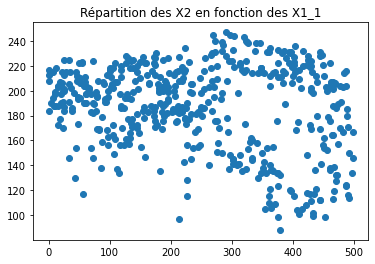

In [7]:
plt.scatter(X1_1, X2)
plt.title("Répartition des X2 en fonction des X1_1")

Cette vue permet de voir la projection des données de X2 sur l'axe X1_1. Les données semblent légèrement compactées sur les hautes valeurs et plus diffuse spour des faibles valeurs. Il n'y a pas de comportement ou de corrélation entre les positions des point.

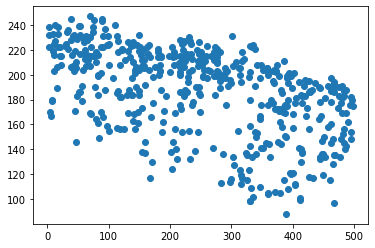

In [8]:
plt.scatter(X1_2, X2)

La projection des données sur l'axe X1_2 (suposément l'axe y) révèle une tendance. Il semble que la limite supérieure des points suive un droite. On s'attend donc à voir une pente pour les y croissant.

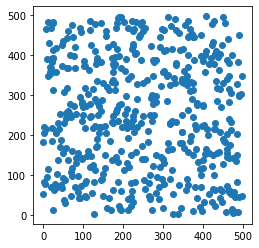

In [9]:
plt.scatter(X1_1, X1_2)
plt.gca().set_aspect("equal")

Les échantillons sont pris aléatoirements dans l'espace, il semble assez homogène mais on observe tout de même des zones légèrement moins échantillonnées.

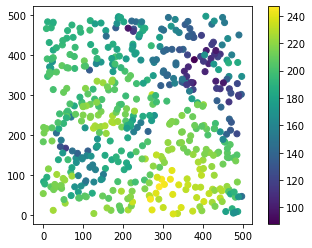

In [10]:
plt.scatter(X1_1, X1_2, c=X2)
plt.colorbar()
plt.gca().set_aspect("equal")

La visualisation en couleur permet de voir une certaine corrélation entre les points. On observe une dépression en haut à droite (x grand, y grand). Une zone plus élevée en bas à gauche (x grand, y faible). Il semble que la portée des données soit d'environ 150 px. Il ne semble pas y avoir trop d'effet de pépite.

### 3 : Analyse avec scikit-gstat.Variogramme

C:\Users\alexc\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 210085.73857289148,
 'normalized_sill': 1791240.7566681853,
 'normalized_nugget': 0,
 'effective_range': 311.7585909591342,
 'sill': 1210.1958715757928,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': None,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

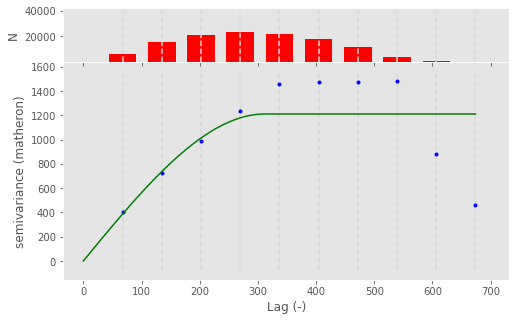

In [11]:
plt.style.use('ggplot')
Vario = skg.Variogram(coordinates=X1, values=X2)
Vario.plot()
Vario.describe()

La trace du Variogramme, montre une portée jusqu'à 300, puis une chute à forte valeur. 
Il semble que la regression automatique soit trop influencée par les points 600 et 700 qui représentent trop peu de valeurs (N faible). Nous allons diminuer la distance maximale de mesure pour forcer la regression automatique à ignorer ces distances. Il semble, par ailleurs, y avoir un léger éffet de pepite.

C:\Users\alexc\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 188327.6807702981,
 'normalized_sill': 2138997.237720334,
 'normalized_nugget': 91031.22160108313,
 'effective_range': 399.2436121854993,
 'sill': 1423.8254771695047,
 'nugget': 60.595016322518255,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 471.711193422416,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

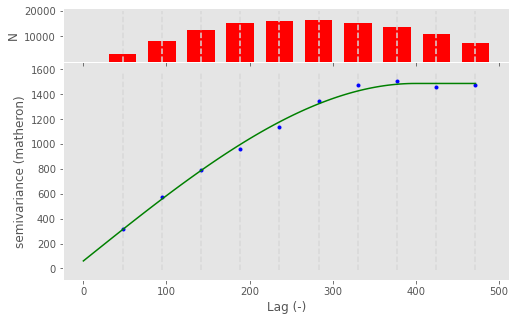

In [12]:
plt.style.use('ggplot')
Vario = skg.Variogram(coordinates=X1, values=X2,maxlag=0.7, use_nugget=True)
Vario.plot()
Vario.describe()

La correction de la valeur maximale de distance couplée à l'autorisation de l'effet de pépite permet d'avoir une régression beaucoup plus fine.
On observe un effet de pépite d'une intensité de 60, sur 1600 de variance globale (3,8%) cette fluctuations locale peut etre due à un bruit ajouté au dataset, ou encore cela peut signifier que l'échantillonnage est trop éparse par rapport aux variations de la surface d'origine.

In [13]:
Kri = skg.OrdinaryKriging(Vario, max_points=50)
xx,yy = np.mgrid[0:500:100j, 0:500:100j]
xx = xx.flatten()
yy = yy.flatten()
zz = Kri.transform(xx,yy)
zz_err = Kri.sigma


Le max_points doit avoir une valeur car le temps de calcul semble assez long. Le calcul "Kri.sigma" semble prendre aussi une grande puissance de calcul.

In [14]:
zz_err

array([354.19537494, 327.63896536, 305.9301054 , ..., 390.93240993,
       417.54243617, 444.95105654])

### 4 : Interpolation et visualisation des résultats

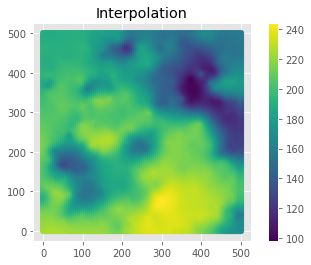

In [15]:
plt.scatter(xx,yy,c=zz)
plt.title("Interpolation")
plt.gca().set_aspect("equal")
plt.colorbar()

L'interpolation parait assez fidèle à l'échantillonnage de départ affiché ci-dessous. On observe bien une zone profonde en haut à droite et une zone plus élevé en bas à droite. La porté, de 400 semble un peu grande mais il reste sujet à interprétation. 

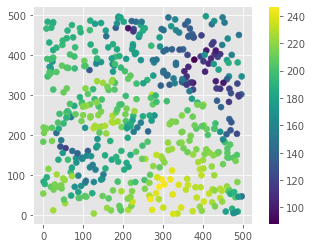

In [16]:
plt.scatter(X1_1, X1_2, c=X2)
plt.colorbar()
plt.gca().set_aspect("equal")
plt.show()


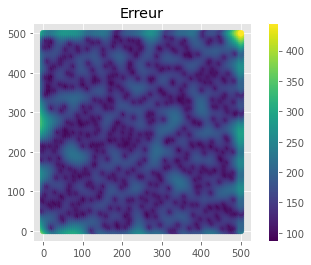

In [17]:
plt.scatter(xx,yy,c=zz_err)
plt.title("Erreur")
plt.colorbar()
plt.gca().set_aspect("equal")
plt.show()

La visualisation de l'erreur montre que cette dernière est assez uniforme sauf une petite zone tout en haut à droite. L'unité de cette dernière est un peut perturbante. 
Dans le code de Kriging.transforme, la variable sigma correspond à 
```
 # calculate Kriging variance
 # sigma is the weights times the semi-variance to p0
 # plus the lagrange factor
```
$\sigma^2 = \sum_i(w_i * \gamma(p_0 - p_i)) + \lambda$

Donc l'erreur ci-dessus est calculée comme suit 
$\epsilon(x,y) = w_i(x,y) * \frac{\sigma^2}{2}$
L'unité de cette erreur est la variance/2 fois les poids, son unité n'est pas donc pas réellement définissable.

### 5 : Vue d'ensemble

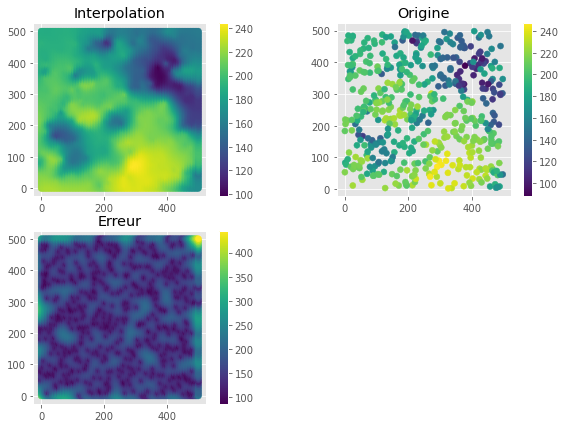

In [18]:
fig = plt.figure(figsize=(10, 7))
rows=2
columns=2

fig.add_subplot(rows, columns, 1)
plt.scatter(xx,yy,c=zz)
plt.title("Interpolation")
plt.gca().set_aspect("equal")
plt.colorbar()

fig.add_subplot(rows, columns, 2)
plt.scatter(X1_1, X1_2, c=X2)
plt.colorbar()
plt.title("Origine")
plt.gca().set_aspect("equal")

fig.add_subplot(rows, columns, 3)
plt.scatter(xx,yy,c=zz_err)
plt.title("Erreur")
plt.colorbar()
plt.gca().set_aspect("equal")

plt.show()